In [1]:
import itertools
import os
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io
from skimage import exposure
from skimage.registration import phase_cross_correlation
from skimage.util import img_as_ubyte

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from config import *

In [5]:
csv_file = data_meta / "all_info.csv"

df = pd.read_csv(csv_file)

In [20]:
df_subset = df.query('Location == 1 & Cycle == "Cycle1" & Channel == "CH1" & After_bleach == False')
df_subset

Cycle  Location  After_bleach  Z_stack Channel    Marker  \
12600  Cycle1         1         False        1     CH1  Hoeschst   
12602  Cycle1         1         False        2     CH1  Hoeschst   
12604  Cycle1         1         False        3     CH1  Hoeschst   
12606  Cycle1         1         False        4     CH1  Hoeschst   
12608  Cycle1         1         False        5     CH1  Hoeschst   
12610  Cycle1         1         False        6     CH1  Hoeschst   
12612  Cycle1         1         False        7     CH1  Hoeschst   
12614  Cycle1         1         False        8     CH1  Hoeschst   
12616  Cycle1         1         False        9     CH1  Hoeschst   
12618  Cycle1         1         False       10     CH1  Hoeschst   
12620  Cycle1         1         False       11     CH1  Hoeschst   
12622  Cycle1         1         False       12     CH1  Hoeschst   
12624  Cycle1         1         False       13     CH1  Hoeschst   
12626  Cycle1         1         False       14     CH1  Hoeschst   
12628  Cycle1         1         False       15     CH1  Hoeschst   
12630  Cycle1         1         False       16     CH1  Hoeschst   
12632  Cycle1         1         False       17     CH1  Hoeschst   
12634  Cycle1         1         False       18     CH1  Hoeschst   
12636  Cycle1         1         False       19     CH1  Hoeschst   

                                                    Path  \
12600  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12602  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12604  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12606  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12608  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12610  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12612  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12614  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12616  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12618  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12620  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12622  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12624  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12626  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12628  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12630  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12632  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12634  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   
12636  Y:\coskun-lab\Thomas\Spatial signaling\dataset...   

                                          Path_corrected  
12600  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12602  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12604  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12606  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12608  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12610  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12612  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12614  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12616  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12618  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12620  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12622  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12624  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12626  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12628  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12630  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12632  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12634  Y:\coskun-lab\Thomas\Spatial signaling\dataset...  
12636  Y:\coskun-lab\Thomas\Spatial signaling\dataset...

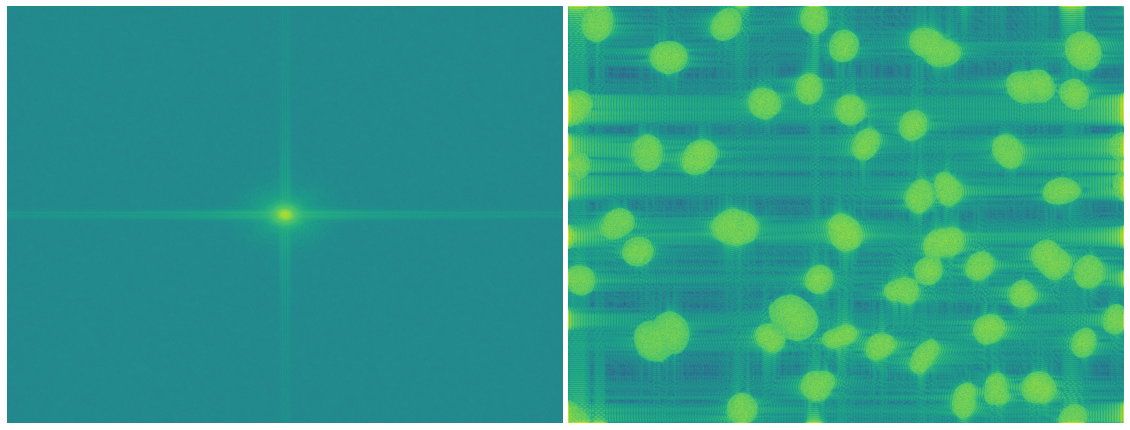

In [25]:
size=60

path = df_subset.iloc[17].Path_corrected
img = skimage.io.imread(path)


(h, w) = img.shape
(cX, cY) = (int(w / 2.0), int(h / 2.0))

# compute the FFT to find the frequency transform, then shift
# the zero frequency component (i.e., DC component located at
# the top-left corner) to the center where it will be more
# easy to analyze
fft = np.fft.fft2(img)
fftShift = np.fft.fftshift(fft)

mag = 20 * np.log(np.abs(fftShift))

# zero-out the center of the FFT shift (i.e., remove low
# frequencies), apply the inverse shift such that the DC
# component once again becomes the top-left, and then apply
# the inverse FFT
fftShift[cY - size:cY + size, cX - size:cX + size] = 0
fftShift = np.fft.ifftshift(fftShift)
recon = np.fft.ifft2(fftShift)

magnitude = 20 * np.log(np.abs(recon))
mean = np.mean(magnitude)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(mag)
ax[1].imshow(magnitude)
ax[0].axis('off')
ax[1].axis('off')
fig.subplots_adjust(wspace=0.01)

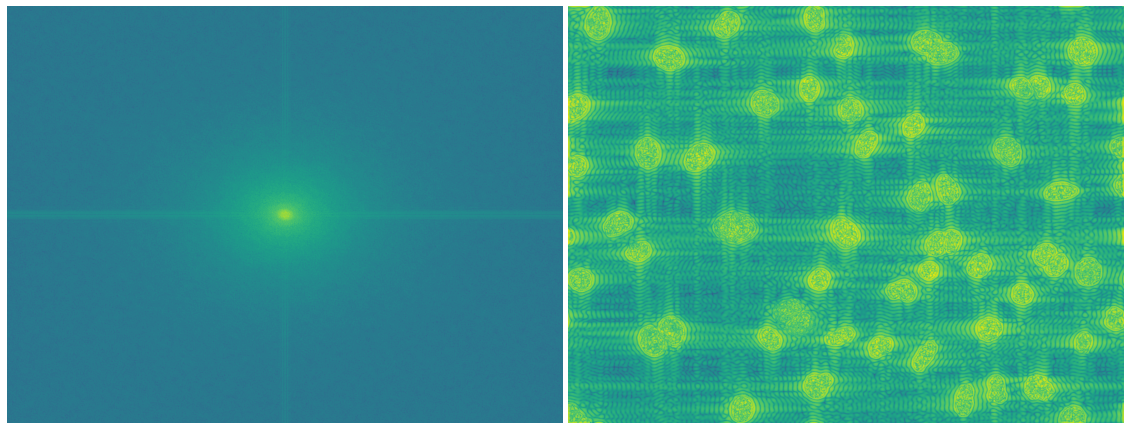

In [23]:
size=60

path = df_subset.iloc[10].Path_corrected
img = skimage.io.imread(path)


(h, w) = img.shape
(cX, cY) = (int(w / 2.0), int(h / 2.0))

# compute the FFT to find the frequency transform, then shift
# the zero frequency component (i.e., DC component located at
# the top-left corner) to the center where it will be more
# easy to analyze
fft = np.fft.fft2(img)
fftShift = np.fft.fftshift(fft)

mag = 20 * np.log(np.abs(fftShift))

# zero-out the center of the FFT shift (i.e., remove low
# frequencies), apply the inverse shift such that the DC
# component once again becomes the top-left, and then apply
# the inverse FFT
fftShift[cY - size:cY + size, cX - size:cX + size] = 0
fftShift = np.fft.ifftshift(fftShift)
recon = np.fft.ifft2(fftShift)

magnitude = 20 * np.log(np.abs(recon))
mean = np.mean(magnitude)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(mag)
ax[1].imshow(magnitude)
ax[0].axis('off')
ax[1].axis('off')
fig.subplots_adjust(wspace=0.01)

# Get folder information

Read information to pandas dataframe of the image folder

In [46]:
channel2marker = {
    "Cycle1": {"CH1": "Hoeschst", "CH4": "WGA", "CH3": "Phalloidin"},
    "Cycle2": {"CH1": "Hoeschst", "CH2": "Cyclin E", "CH3": "EMMPRIN", "CH4": "Wnt1"},
    "Cycle3": {
        "CH1": "Hoeschst",
        "CH2": "Non-phospho-B-catenin",
        "CH3": "APC",
        "CH4": "DKK1",
    },
    "Cycle4": {"CH1": "Hoeschst", "CH3": "AXIN1", "CH2": "DKK2"},
    "Cycle5": {"CH1": "Hoeschst", "CH3": "Cyclin D1"},
    "Cycle6": {
        "CH1": "Hoeschst",
        "CH2": "p-AKT",
        "CH3": "phospho-B-catenin",
        "CH4": "RNF 43",
    },
    "Cycle7": {"CH1": "Hoeschst", "CH2": "AKT", "CH3": "p-mTOR", "CH4": "mTOR"},
    "Cycle8": {"CH1": "Hoeschst", "CH2": "Concanavalin A"},
}


def get_info(img_folder, name_dict=channel2marker, save=False):
    """Function returns the info from folder containing multi-cycle staigning on cell

    Args:
        img_folder (str) : imgage folder path to get information
        name_dict (dict) : three level dictionnary mapping cycle -> channel -> marker name

    Returns:
        pandas dataframe with information
    """
    conditions = []
    cycles = []
    z_stacks = []
    channels = []
    images_path = []
    markers = []

    # Loop through image folder
    for (dirpath, dirnames, filenames) in os.walk(img_folder):
        for name in sorted(filenames):
            if "AftBleach" not in dirpath:
                if "tif" in name and "Overlay" not in name and "FF" not in name:
                    # Get information from image name
                    condition = dirpath[-3:]
                    z_stack = "_".join(name.split("_")[2:3])
                    channel = name.split("_")[-1].split(".")[0]
                    cycle = dirpath.split("\\")[-1].split("_")[1]

                    # Cycle 1 only have autoexposure condition
                    if cycle != "Cycle1":
                        if "Ac" in condition or "Aw" in condition:
                            continue

                    if z_stack == "":
                        continue

                    # Don't use stiched images for now
                    if condition == "3x3":
                        continue

                    markers.append(name_dict[cycle][channel])

                    location = condition[-1]
                    cycles.append(cycle)
                    conditions.append(location)
                    z_stacks.append(int(z_stack[1:]))
                    channels.append(channel)
                    images_path.append(os.path.join(dirpath, name))

    info = {
        "Cycle": cycles,
        "Location": conditions,
        "Z_stack": z_stacks,
        "Channel": channels,
        "Marker": markers,
        "Path": images_path,
    }

    df = pd.DataFrame(info)

    if save == True:
        df.to_csv(data_meta / "info.csv", index=False)

    df.Z_stack = pd.to_numeric(df.Z_stack)

    df["Path_corrected"] = ""

    return df

In [47]:
if not csv_exist:
    df = get_info(data_raw, save=True)
    print("Created pandas dataframe")
else:
    df = pd.read_csv(csv_file)
    print("Imported pandas dataframe")

Imported pandas dataframe


# Image background subtraction

Image shadding correction using background subtration of gaussian blurr

In [48]:
def extract_condition_channel(df, cycle, condition, channel):
    """Function returns dataframe of specified channel image based on condition from input dataframe

    Args:
        df (pd DataFrame) : info dataframe for all images
        condition (str) : condition name

    Returns:
        pandas dataframe with information
    """
    return df[
        (df["Location"] == condition)
        & (df["Channel"] == channel)
        & (df["Cycle"] == cycle)
    ]


def background_correction(
    df, filtersize=1025, sigma=256, folder=data_processed, save=False, show=False
):
    """Function to perform background substraction for image using gaussian blurr of original image

    Args:
        df (pd DataFrame) : info dataframe for all images
        filtersize (int) : filter size of gaussian kernel
        sigma (int) : sigma of guassian blurr
        folder (str) : folder to save corrected images
        save (bool) : bool to save the image
        show (bool) : bool to show corrected image and gaussian blur of original image

    Returns:
        None
    """
    # Loop through the rows of the dataframe
    for row in df.itertuples():
        # Read image
        img = skimage.io.imread(row.Path)

        if len(img.shape) > 2:
            img = img[:, :, 0]

        # Define saving filename for corrected image
        filename = "_".join([row.Location, str(row.Z_stack), row.Cycle, row.Marker])
        path = os.path.join(folder, filename + ".tiff")

        # Don't need background substraction for cycle 1 and 8
        if row.Cycle == "Cycle1" or row.Cycle == "Cycle8":
            if save:
                cv2.imwrite(path, img)
                df.at[row.Index, "Path_corrected"] = path
            continue

        # Background substraction using gaussian blur channel
        gaussianImg = cv2.GaussianBlur(img, (filtersize, filtersize), sigma)
        img_corrected = cv2.subtract(img, gaussianImg)

        # Save image
        if save:
            cv2.imwrite(path, img_corrected)
            df.at[row.Index, "Path_corrected"] = path

        # Show correction
        if show:
            fig = plt.figure(figsize=(25, 7))
            ax1 = plt.subplot(1, 3, 1)
            ax2 = plt.subplot(1, 3, 2)
            ax3 = plt.subplot(1, 3, 3)

            ax1.imshow(img, alpha=1)
            ax1.set_axis_off()
            ax1.set_title("Original Image")

            ax2.imshow(img_corrected, alpha=1)
            ax2.set_axis_off()
            ax2.set_title("Corrected image")

            ax3.imshow(gaussianImg, cmap="gray", alpha=1)
            ax3.set_axis_off()
            ax3.set_title("Background image")
            plt.show()

In [49]:
df_subset = df[(df.Location == 1) & (df.Z_stack != "Combined")]

In [50]:
df_subset

Cycle  Location Z_stack Channel          Marker  \
0    Cycle1         1       1     CH1        Hoeschst   
1    Cycle1         1       1     CH3      Phalloidin   
2    Cycle1         1       1     CH4             WGA   
3    Cycle1         1       2     CH1        Hoeschst   
4    Cycle1         1       2     CH3      Phalloidin   
..      ...       ...     ...     ...             ...   
585  Cycle8         1      17     CH2  Concanavalin A   
586  Cycle8         1      18     CH1        Hoeschst   
587  Cycle8         1      18     CH2  Concanavalin A   
588  Cycle8         1      19     CH1        Hoeschst   
589  Cycle8         1      19     CH2  Concanavalin A   

                                                  Path  \
0    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
1    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
2    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
3    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
4    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
..                                                 ...   
585  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
586  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
587  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
588  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   
589  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...   

                                        Path_corrected  
0    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
1    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
2    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
3    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
4    Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
..                                                 ...  
585  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
586  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
587  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
588  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  
589  Y:\coskun-lab\Thomas\Spatial signaling\Spatial...  

[230 rows x 7 columns]

In [ ]:
# filtersize = 1025
# sigma = 256

# for row in df_subset.itertuples():
#     if row.Cycle == 'Cycle1' or row.Cycle == 'Cycle8':
#         continue
#     elif row.Z_stack != '1':
#         continue
#     elif row.Channel == 'CH1':
#         continue

#     print(row.Cycle, row.Marker)

#     img = skimage.io.imread(row.Path)
#     if len(img.shape) > 2:
#         img = img[:,:,0]


#     # Background substraction using gaussian blur channel
#     gaussianImg = cv2.GaussianBlur(img, (filtersize, filtersize), sigma)
#     img_corrected = cv2.subtract(img, gaussianImg)

#     # Contrast stretching
#     p2, p98 = np.percentile(img, (0, 99))
#     img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

#     p2, p98 = np.percentile(img_corrected, (0, 99))
#     img_rescale1 = exposure.rescale_intensity(img_corrected, in_range=(p2, p98))

#     fig = plt.figure(figsize=(15, 9))
#     ax1 = plt.subplot(1, 2, 1)
#     ax2 = plt.subplot(1, 2, 2)

#     ax1.imshow(img_rescale, cmap='gray')
#     ax1.set_axis_off()
#     ax1.set_title('Original Image')

#     ax2.imshow(img_rescale1, cmap='gray')
#     ax2.set_axis_off()
#     ax2.set_title('Corrected image')
#     plt.show()
#     filename = '_'.join([str(row.Location), str(row.Z_stack), row.Cycle, row.Marker])
#     path = os.path.join(data_dir / 'test', filename+'.png')
#     fig.savefig(path, bbox_inches='tight')

#     # Define saving filename for corrected image
#     filename = '_'.join([str(row.Location), str(row.Z_stack), row.Cycle, row.Marker])
#     path = os.path.join(data_dir / 'test', filename+'.tiff')
#     cv2.imwrite(path, img)

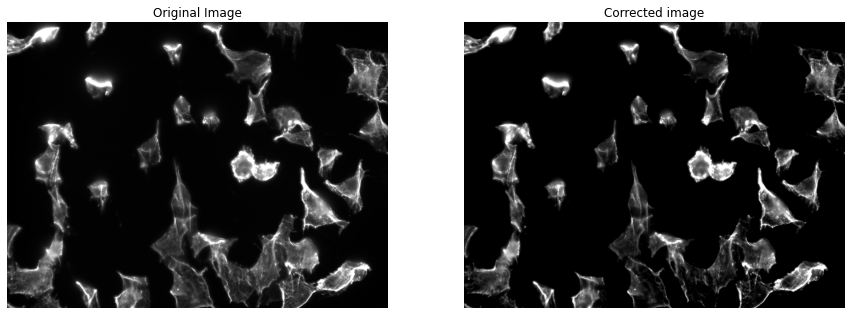

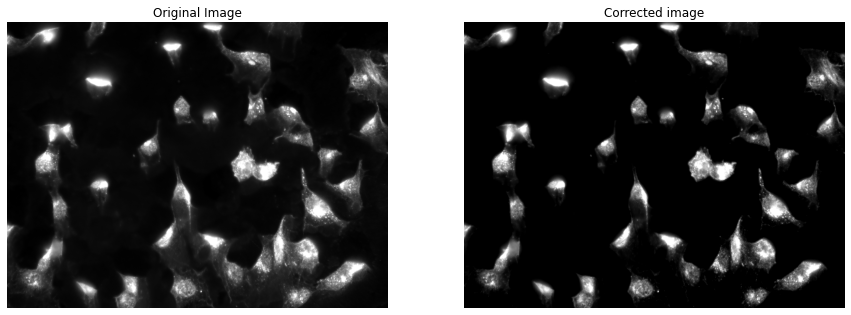

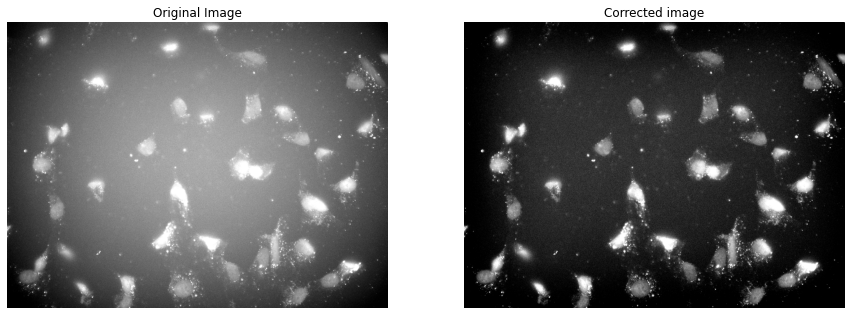

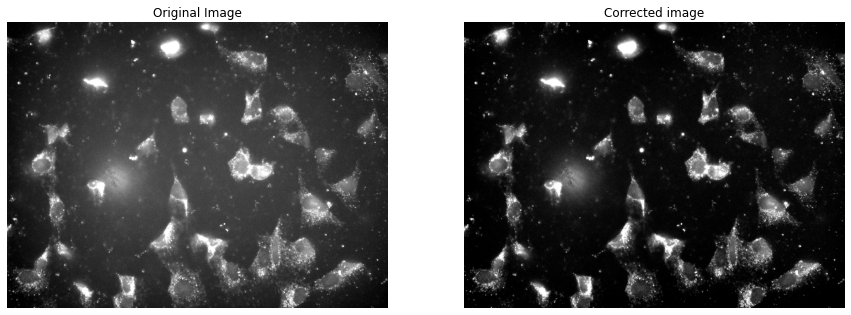

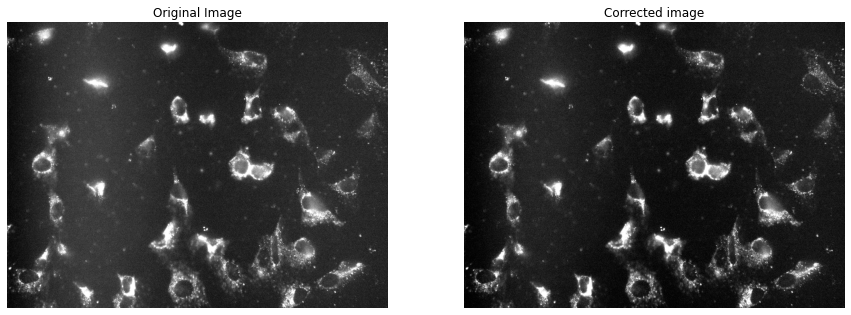

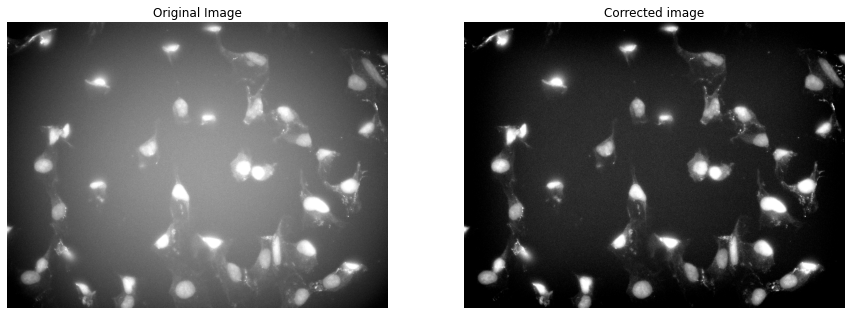

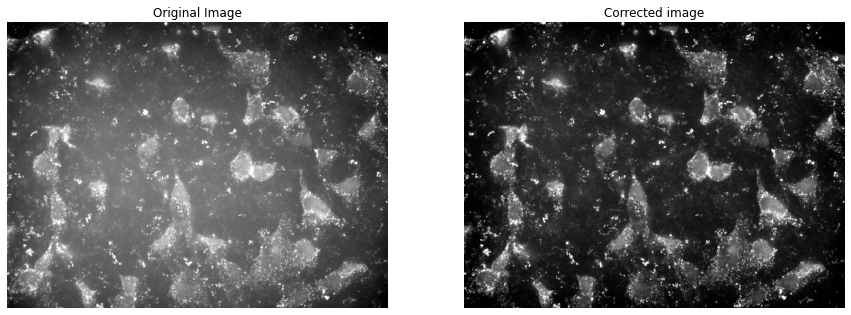

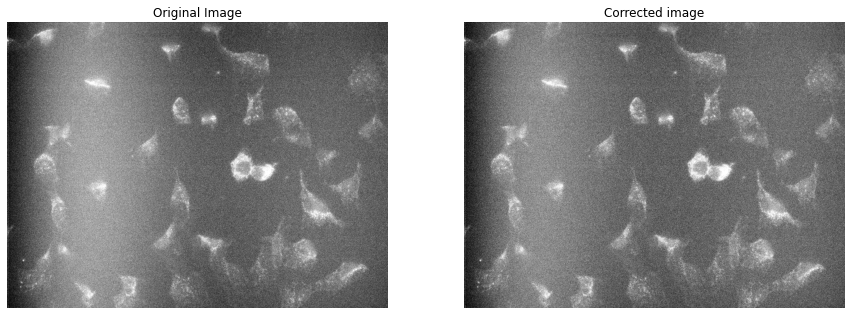

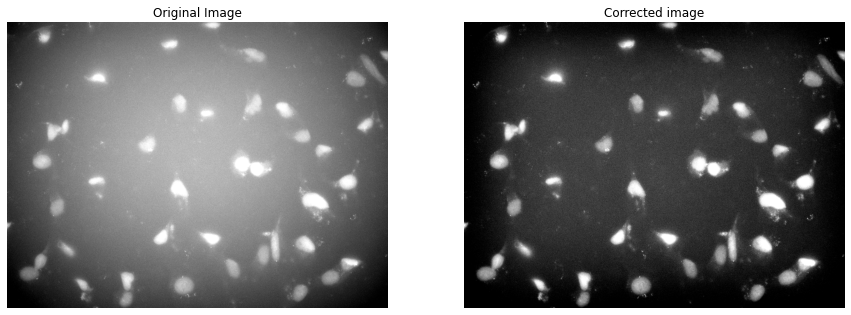

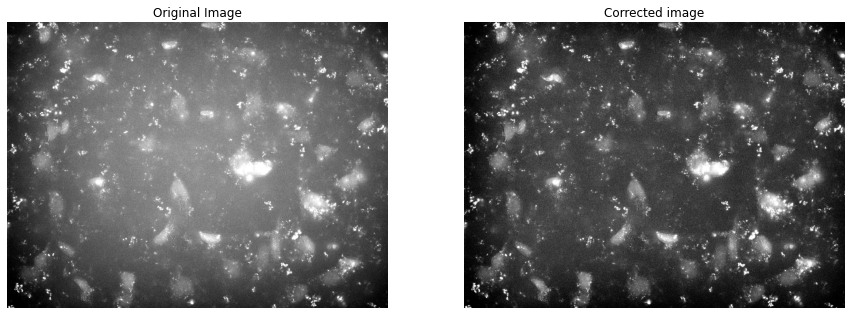

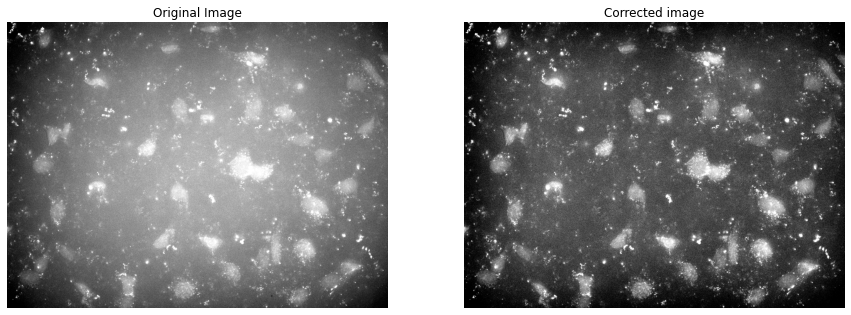

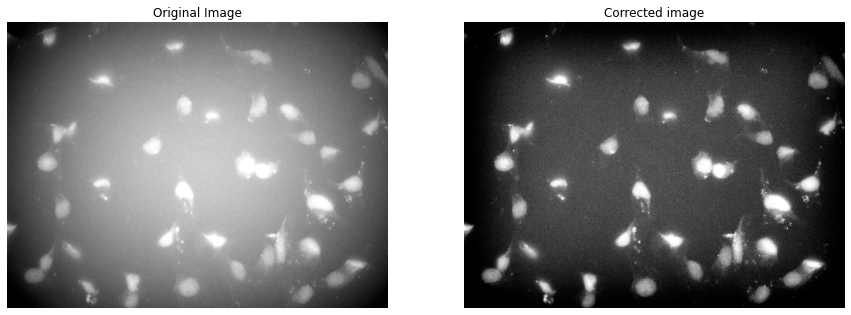

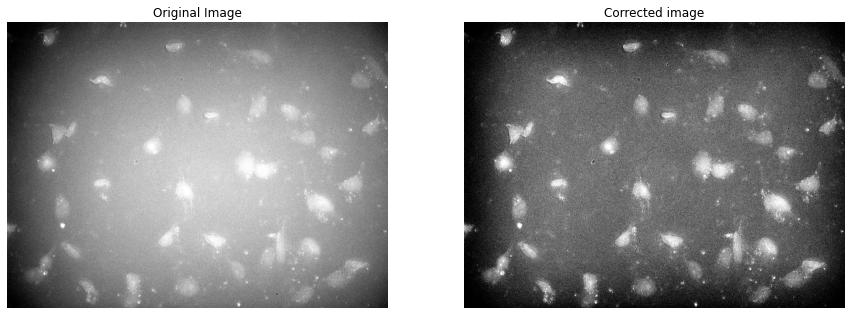

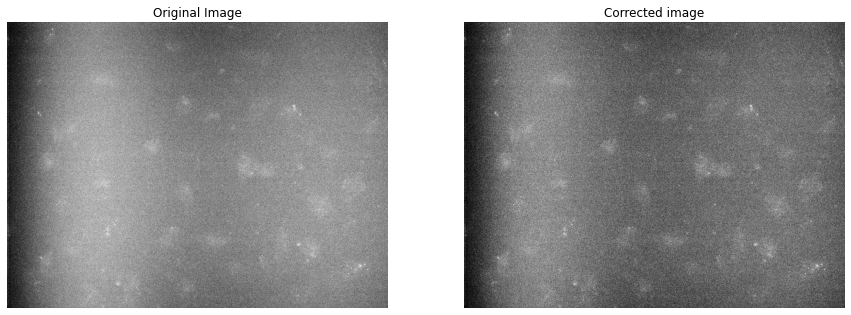

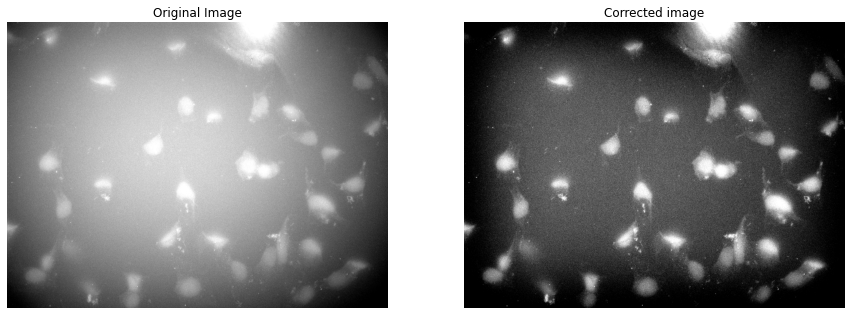

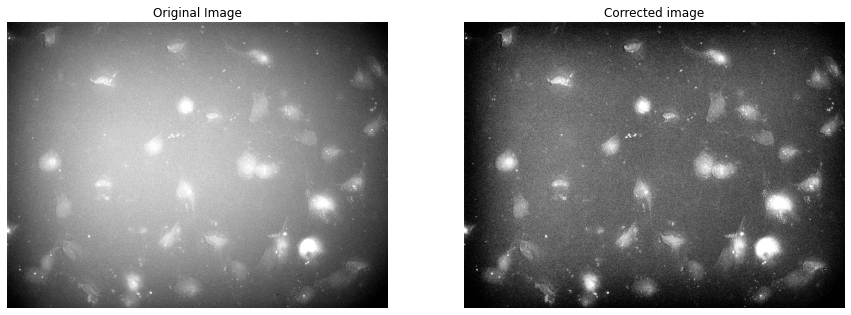

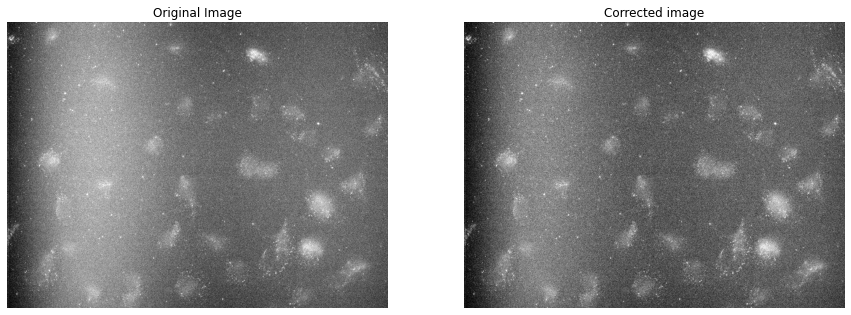

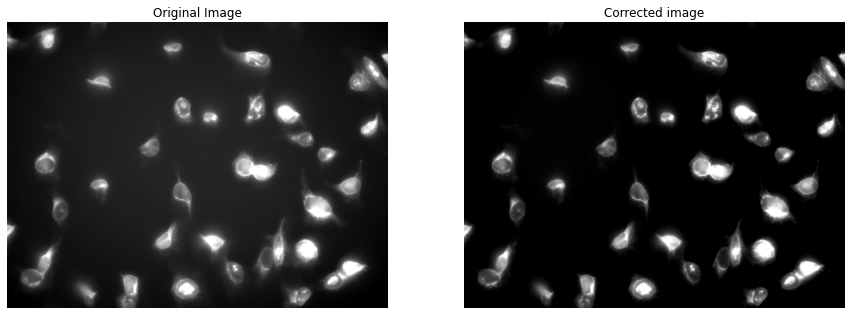

In [51]:
# filtersize = 1025
# sigma = 256

# # Read condition and cycles name
# cycles = df_subset.Cycle.unique()

# # Loop through condition and cycle pair
# for cycle in cycles:
#     # Extract dataset
#     df_temp = df_subset[df_subset.Cycle == cycle]
#     for marker in df_temp.Marker.unique():
#         if marker == 'Hoeschst':
#             continue

#         df_channel = df_temp[df_temp.Marker == marker]
#         imgs = None
#         imgs_corrected = None
#         for row in df_channel.itertuples():
#             img = skimage.io.imread(row.Path)
#             imgs = np.concatenate((imgs, img[np.newaxis,:,:]), axis = 0) if not (imgs is None) else img[np.newaxis,:,:]

#             gaussianImg = cv2.GaussianBlur(img, (filtersize, filtersize), sigma)
#             img_corrected = cv2.subtract(img, gaussianImg)
#             imgs_corrected = np.concatenate((imgs_corrected, img_corrected[np.newaxis,:,:]), axis = 0) if not (imgs_corrected is None) else img_corrected[np.newaxis,:,:]

#         img = np.amax(imgs, axis=0, keepdims=True)[0]
#         img_corrected = np.amax(imgs_corrected, axis=0, keepdims=True)[0]

#         # Contrast stretching
#         p2, p98 = np.percentile(img, (1, 99))
#         img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

#         p2, p98 = np.percentile(img_corrected, (1, 99))
#         img_rescale1 = exposure.rescale_intensity(img_corrected, in_range=(p2, p98))

#         fig = plt.figure(figsize=(15, 9))
#         ax1 = plt.subplot(1, 2, 1)
#         ax2 = plt.subplot(1, 2, 2)

#         ax1.imshow(img_rescale, cmap='gray')
#         ax1.set_axis_off()
#         ax1.set_title('Original Image')

#         ax2.imshow(img_rescale1, cmap='gray')
#         ax2.set_axis_off()
#         ax2.set_title('Corrected image')
#         plt.show()

#         path = os.path.join(data_dir / 'test', marker+'.png')
#         fig.savefig(path, bbox_inches='tight')